# Limpieza de datos

In [431]:
import pandas as pd
import numpy as np
import missingno as msno

In [432]:
# FUNCIONES

class display(object):
    """Representador HTML de múltiples objetos"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    num_missings = round(df.isnull().sum())
    num_missings_df = pd.DataFrame(num_missings.values, columns=["MISSINGS"])
   
    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, num_missings_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T

In [433]:
df_raw = pd.read_csv('../data/raw/data_raw_1990_2023.csv')
df_raw.head()

,Unnamed: 0,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,...,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,0,1990-01-01,5783,SEVILLA AEROPUERTO,SEVILLA,34,"13,1","15,6","10,0",23:59,...,14:15,20.0,"2,5","5,3",12:12,"1,2","1019,3",24,"1016,2",15
1,1,1990-01-02,5783,SEVILLA AEROPUERTO,SEVILLA,34,"11,1","26,1","7,6",04:40,...,Varias,20.0,"1,7","15,6",20:15,"0,8","1019,3",00,"1010,6",24
2,2,1990-01-03,5783,SEVILLA AEROPUERTO,SEVILLA,34,"10,3","6,4","7,6",23:59,...,00:00,18.0,"2,2","9,7",00:57,"0,3","1014,4",24,"1008,1",15
3,3,1990-01-04,5783,SEVILLA AEROPUERTO,SEVILLA,34,"9,6","0,0","4,4",07:30,...,14:50,31.0,"2,2","7,2",12:45,"4,9","1023,3",24,"1014,4",00
4,4,1990-01-05,5783,SEVILLA AEROPUERTO,SEVILLA,34,"11,1","0,0","6,4",08:00,...,16:00,6.0,"2,2","6,1",09:12,"6,7","1026,4",12,"1023,1",Varias


Limpieza y formateo de columnas

In [434]:
# INFO DE LA ESTACIÓN
df_raw.drop(['Unnamed: 0', 'indicativo', 'nombre', 'provincia', 'altitud'], axis=1, inplace=True)
# NO NOS SIRVEN
df_raw.drop(['horatmin', 'horatmax', 'horaracha', 'horaPresMax', 'horaPresMin'], axis=1, inplace=True)

df_raw.head()

,fecha,tmed,prec,tmin,tmax,dir,velmedia,racha,sol,presMax,presMin
0,1990-01-01,"13,1","15,6","10,0","16,2",20.0,"2,5","5,3","1,2","1019,3","1016,2"
1,1990-01-02,"11,1","26,1","7,6","14,6",20.0,"1,7","15,6","0,8","1019,3","1010,6"
2,1990-01-03,"10,3","6,4","7,6","13,0",18.0,"2,2","9,7","0,3","1014,4","1008,1"
3,1990-01-04,"9,6","0,0","4,4","14,8",31.0,"2,2","7,2","4,9","1023,3","1014,4"
4,1990-01-05,"11,1","0,0","6,4","15,8",6.0,"2,2","6,1","6,7","1026,4","1023,1"


In [435]:
df_raw.dtypes

fecha        object
tmed         object
prec         object
tmin         object
tmax         object
dir         float64
velmedia     object
racha        object
sol          object
presMax      object
presMin      object
dtype: object

Tipos correctos de columna: 
- Hacemos de la fecha el index.
- Todo lo demás serán float64

In [436]:
# CAMBIO COMA POR PUNTOS
df_raw = df_raw.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# FECHA
df_raw['fecha'] = pd.to_datetime(df_raw['fecha'])
df_raw.set_index('fecha', inplace=True)

# EN LA COLUMNA 'PREC' HAY VALORES DE TEXTO. LOS CAMBIAMOS POR NaN
df_raw['prec'] = df_raw['prec'].replace('Ip', float('nan'))

# CAMBIO TODOS LOS VALORES A FLOAT
df_raw = df_raw.astype('float64')

df_raw.head()

,tmed,prec,tmin,tmax,dir,velmedia,racha,sol,presMax,presMin
fecha,,,,,,,,,,
1990-01-01,13.1,15.6,10.0,16.2,20.0,2.5,5.3,1.2,1019.3,1016.2
1990-01-02,11.1,26.1,7.6,14.6,20.0,1.7,15.6,0.8,1019.3,1010.6
1990-01-03,10.3,6.4,7.6,13.0,18.0,2.2,9.7,0.3,1014.4,1008.1
1990-01-04,9.6,0.0,4.4,14.8,31.0,2.2,7.2,4.9,1023.3,1014.4
1990-01-05,11.1,0.0,6.4,15.8,6.0,2.2,6.1,6.7,1026.4,1023.1


Vamos a ver los missings.

In [437]:
data_report(df_raw)

COL_N,tmed,prec,tmin,tmax,dir,velmedia,racha,sol,presMax,presMin
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
MISSINGS (%),0.23,3.64,0.23,0.21,1.72,0.45,1.72,1.11,0.72,0.72
MISSINGS,28,441,28,26,209,54,209,134,87,87
UNIQUE_VALUES,309,346,290,366,37,42,81,145,371,410
CARDIN (%),2.55,2.85,2.39,3.02,0.31,0.35,0.67,1.2,3.06,3.38


<AxesSubplot:>

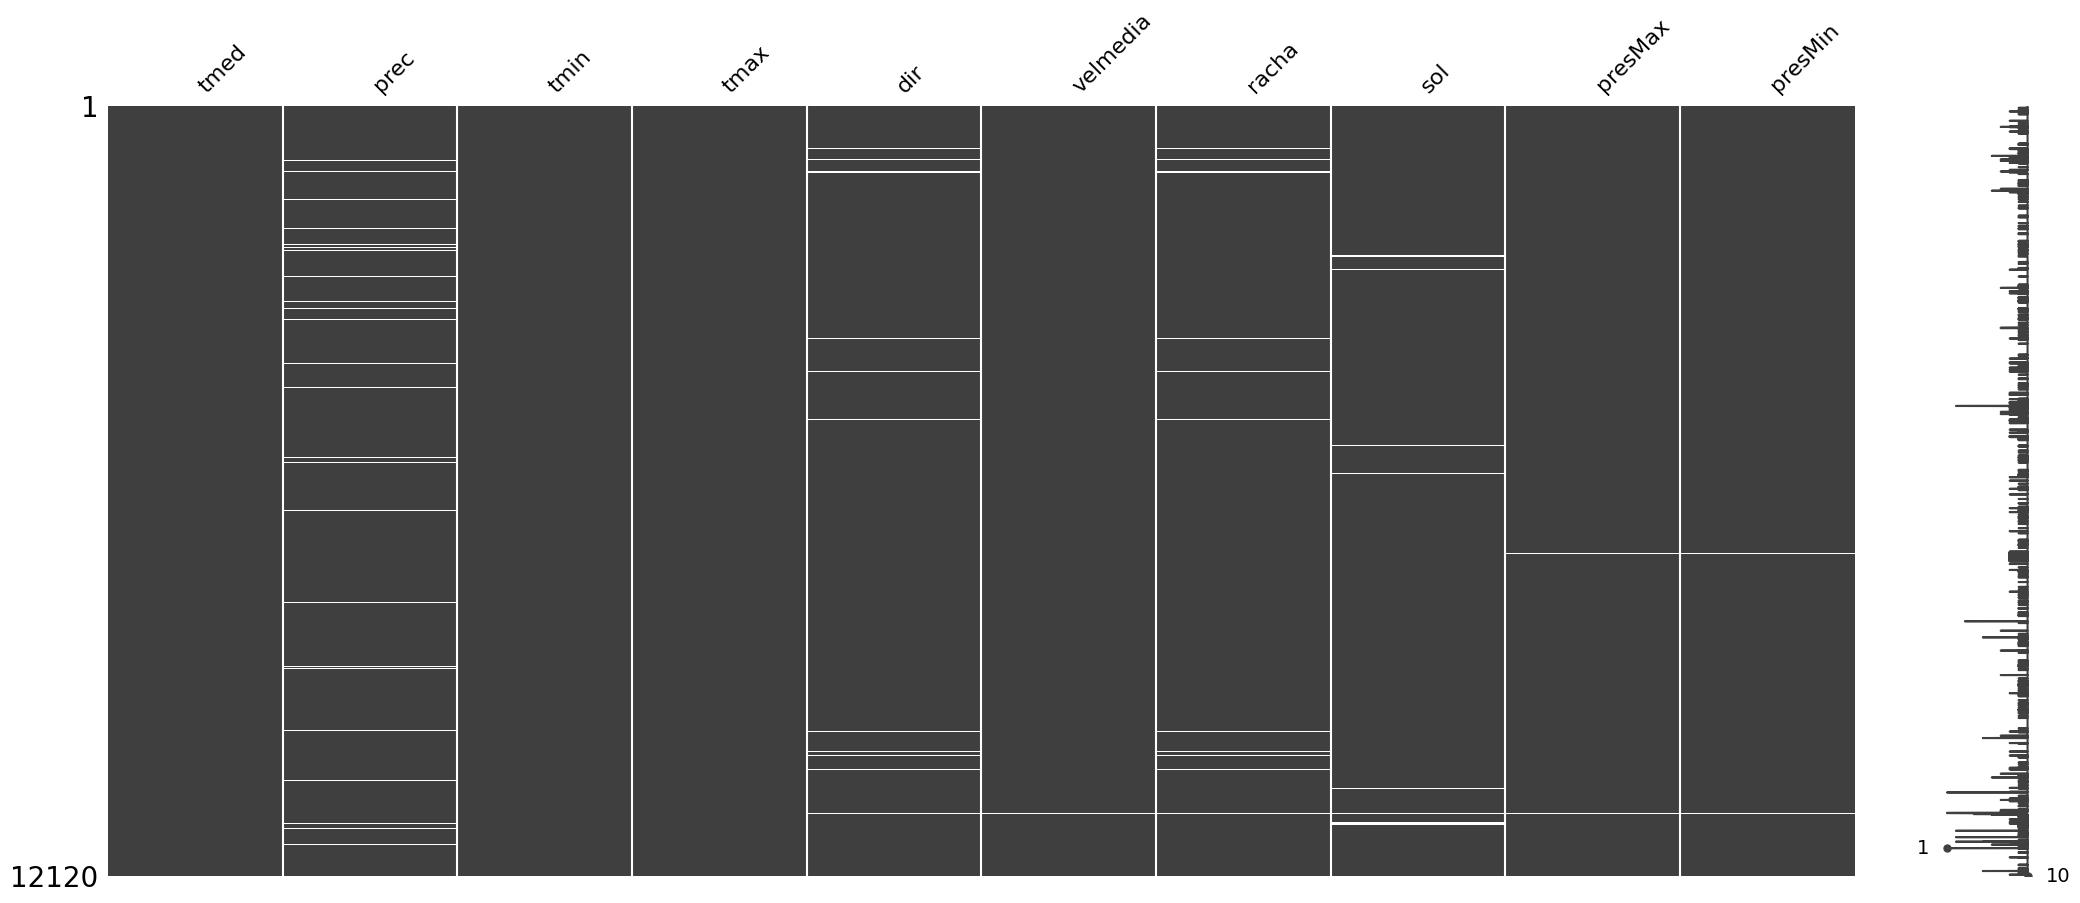

In [438]:
msno.matrix(df_raw)

Nos valen todas las columnas tal cual. El porcentaje más grande de missings es un 3.64%. Vamos a estudiar como arreglarlos. Segmentamos el DF por valores parecidos y luego concatenamos.

- Temperaturas

In [439]:
df_temp = df_raw[['tmin', 'tmax', 'tmed']]

nan_tmin = df_temp[['tmin']][df_temp['tmin'].isnull()].head(5)
nan_tmax = df_temp[['tmax']][df_temp['tmax'].isnull()].head(5)
nan_tmed = df_temp[['tmed']][df_temp['tmed'].isnull()].head(5)

display("nan_tmin", "nan_tmax", "nan_tmed")


,tmin
fecha,
1997-11-02,NaN
2002-12-03,NaN
2002-12-04,NaN
2002-12-05,NaN
2002-12-06,NaN
,tmax
fecha,
1997-11-02,NaN
2002-12-03,NaN


Los días sin datos son los mismos en las tres columnas. No queremos dropearlos, sino asignar un valor. Veamos qué podemos hacer.

In [440]:
df_temp.loc['1997-10-31':'1997-11-04']

,tmin,tmax,tmed
fecha,,,
1997-10-31,9.8,21.6,15.7
1997-11-01,12.0,22.6,17.3
1997-11-02,NaN,NaN,NaN
1997-11-03,16.4,24.0,20.2
1997-11-04,17.2,22.6,19.9


Usaremos la media movil de 10 días, siendo el NAN el central.

In [441]:
df_temp = df_temp.fillna(df_temp.rolling(10, center=True, min_periods=1).mean()).round(2)
data_report(df_temp)

COL_N,tmin,tmax,tmed
DATA_TYPE,float64,float64,float64
MISSINGS (%),0.0,0.0,0.0
MISSINGS,0,0,0
UNIQUE_VALUES,310,385,330
CARDIN (%),2.56,3.18,2.72


- Presiones

In [442]:
df_presion = df_raw[['presMin', 'presMax']]

nan_presmin = df_presion[['presMin']][df_presion['presMin'].isnull()].head(5)
nan_presmax = df_presion[['presMax']][df_presion['presMax'].isnull()].head(5)

display("nan_presmin", "nan_presmax")

,presMin
fecha,
1990-11-21,NaN
1990-11-22,NaN
1990-11-24,NaN
1990-11-25,NaN
1990-11-26,NaN
,presMax
fecha,
1990-11-21,NaN
1990-11-22,NaN


Tenemos que usar una ventana de 25 dias para arreglar todos los NaN 

In [443]:
df_presion = df_presion.fillna(df_presion.rolling(24, center=True, min_periods=1).mean()).round(2)
data_report(df_presion)

COL_N,presMin,presMax
DATA_TYPE,float64,float64
MISSINGS (%),0.0,0.0
MISSINGS,0,0
UNIQUE_VALUES,477,444
CARDIN (%),3.94,3.66


- Viento

In [444]:
df_viento = df_raw[['dir', 'velmedia', 'racha']]

nan_dir = df_viento[['dir']][df_viento['dir'].isnull()].head(5)
nan_velmedia = df_viento[['velmedia']][df_viento['velmedia'].isnull()].head(5)
nan_racha = df_viento[['racha']][df_viento['racha'].isnull()].head(5)

display("nan_dir", "nan_velmedia", "nan_racha")

,dir
fecha,
1990-03-27,NaN
1990-08-21,NaN
1990-08-22,NaN
1990-08-23,NaN
1991-02-07,NaN
,velmedia
fecha,
1992-02-25,NaN
1992-04-21,NaN


In [445]:
df_viento = df_viento.fillna(df_viento.rolling(28, center=True, min_periods=1).mean()).round(2)
data_report(df_viento)

COL_N,dir,velmedia,racha
DATA_TYPE,float64,float64,float64
MISSINGS (%),0.0,0.0,0.0
MISSINGS,0,0,0
UNIQUE_VALUES,216,85,242
CARDIN (%),1.78,0.7,2.0


- Sol

In [446]:
df_sol = df_raw[['sol']]

nan_sol = df_sol[['sol']][df_sol['sol'].isnull()].head(5)

display("nan_sol")

,sol
fecha,
1992-01-15,NaN
1992-02-29,NaN
1996-04-11,NaN
1996-04-12,NaN
1996-04-13,NaN


In [447]:
df_sol = df_sol.fillna(df_sol.rolling(24, center=True, min_periods=1).mean()).round(2)
data_report(df_sol)

COL_N,sol
DATA_TYPE,float64
MISSINGS (%),0.0
MISSINGS,0
UNIQUE_VALUES,251
CARDIN (%),2.07


- Lluvia + target

In [448]:
df_lluvia = df_raw[['prec']]

nan_prec = df_lluvia[['prec']][df_lluvia['prec'].isnull()].head(5)

display("nan_prec")

,prec
fecha,
1990-01-30,NaN
1990-03-02,NaN
1990-03-07,NaN
1990-03-30,NaN
1990-04-04,NaN


In [449]:
df_lluvia = df_lluvia.fillna(df_lluvia.rolling(7, center=True, min_periods=1).mean()).round(2)
data_report(df_lluvia)

COL_N,prec
DATA_TYPE,float64
MISSINGS (%),0.0
MISSINGS,0
UNIQUE_VALUES,530
CARDIN (%),4.37


In [450]:
def asignar_target(valor):
    if valor == 0:
        return 0
    else:
        return 1
    
df_lluvia['target'] = df_lluvia['prec'].apply(asignar_target)
df_lluvia

,prec,target
fecha,,
1990-01-01,15.6,1
1990-01-02,26.1,1
1990-01-03,6.4,1
1990-01-04,0.0,0
1990-01-05,0.0,0
...,...,...
2023-03-04,0.0,0
2023-03-05,1.5,1
2023-03-06,3.3,1


Monto el DF limpio para trabajar con él

In [451]:
df_clean = pd.concat([df_temp, df_presion, df_viento, df_sol, df_lluvia], axis=1, sort=False)
data_report(df_clean)

COL_N,tmin,tmax,tmed,presMin,presMax,dir,velmedia,racha,sol,prec,target
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MISSINGS,0,0,0,0,0,0,0,0,0,0,0
UNIQUE_VALUES,310,385,330,477,444,216,85,242,251,530,2
CARDIN (%),2.56,3.18,2.72,3.94,3.66,1.78,0.7,2.0,2.07,4.37,0.02


In [452]:
df_clean.to_csv('../data/processed/data_processed_1990_2023.csv')